In [1]:
import numpy as np
from wgpu.gui.auto import WgpuCanvas
import pygfx as gfx
from fastplotlib import Image, GridPlot

RFBOutputContext()


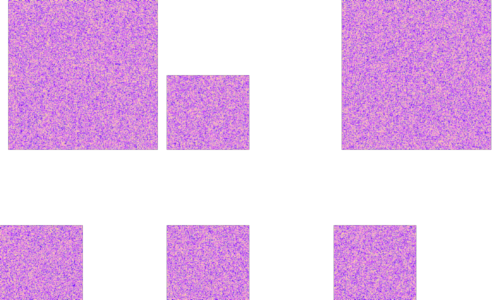

JupyterWgpuCanvas()

In [2]:
canvas = WgpuCanvas()
renderer = gfx.renderers.WgpuRenderer(canvas)

grid_plot = GridPlot(
    canvas=canvas,
    renderer=renderer,
    grid_shape=(2, 3),
    cameras=np.array([['o', 'o', 'o'], ['o', 'o', 'o']]),
    controllers=np.array([[0, 3, 1], [2, 2, 3]])
)

image_graphics = list()

for subplot in grid_plot:
    img = (np.random.rand(512, 512) * 255).astype(np.float32)
    ig = Image(data=img, vmin=0, vmax=255, cmap='gnuplot2')
    image_graphics.append(ig)
    
    subplot.add_graphic(ig)

def set_random_frame():
    for ig in image_graphics:
        new_data = (np.random.rand(512, 512) * 255).astype(np.float32)
        ig.update_data(data=new_data)

grid_plot.add_animations([set_random_frame])

canvas.request_draw(grid_plot.animate)
canvas